<a href="https://colab.research.google.com/github/geexe/thai-cat-image-classification/blob/main/thai_cat_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Load pre-trained model without the top layer
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers
num_custom_classes = 3
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_custom_classes, activation='softmax')  # Replace with your number of classes
])


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Clone the repository
!git clone https://github.com/geexe/thai-cat-image-classification.git

# Navigate to the specific folder
%cd thai-cat-image-classification/Image

# List the contents of the directory
import os
print(os.listdir())

fatal: destination path 'thai-cat-image-classification' already exists and is not an empty directory.
/content/thai-cat-image-classification/Image
['class2', 'class3', 'class1']


In [7]:
training_dir = '/content/thai-cat-image-classification/Image'

# Prepare data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Found 6 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 2.0416 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.2975 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 874ms/step - loss: 1.3528 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 882ms/step - loss: 1.6003 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 1s 842ms/step - loss: 1.7357 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 1s 850ms/step - loss: 1.3101 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 888ms/step - loss: 1.7462 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 1s 901ms/step - loss: 1.4164 - accuracy: 0.1667
Epoch 9/10
1/1 [==============================] - 1s 850ms/step - loss: 1.3290 - accuracy: 0.1667
Epoch 10/10
1/1 [=============================

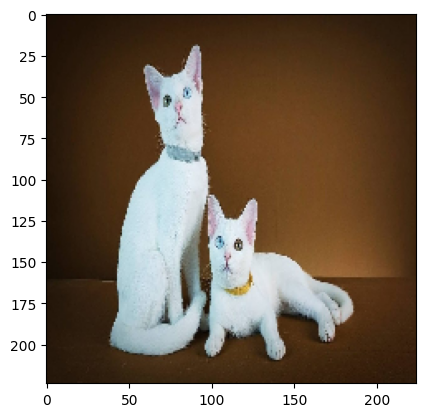

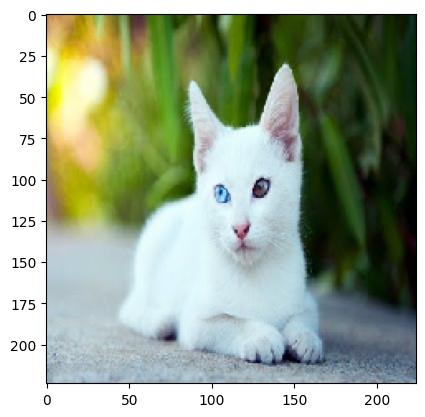

In [14]:
# Load images (from disk) as PIL.Image.Image
img_path1 = '/content/thai-cat-image-classification/Image/class1/class1-1.jpg'
img_path2 = '/content/thai-cat-image-classification/Image/class1/class1-2.jpg'
img1 =  tf.keras.preprocessing.image.load_img(img_path1, target_size=(224, 224))
img2 =  tf.keras.preprocessing.image.load_img(img_path2, target_size=(224, 224))

# Convert PIL Images to NumPy ndarrays
img1 = tf.keras.preprocessing.image.img_to_array(img1).astype(np.uint8)
img2 = tf.keras.preprocessing.image.img_to_array(img2).astype(np.uint8)

# Display the NumPy images
plt.imshow(img1); plt.show()
plt.imshow(img2); plt.show()